In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
# from scipy.optimize import curve_fit
# from scipy.stats import norm
import matplotlib.mlab as mlab
# from pylab import rcParams
#import seaborn as sns
#sns.set()


# from root_numpy import root2array, tree2array,testdata
# from root_pandas import read_root
# from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
# from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
# myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_EXTC1C2_hadd_hist.root'
# myfile_beam_on='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_5E19_hadd_hist.root'
# myfile_Overlay='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_OVERLAY_hadd_hist.root'
myfile_lyattn='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2lyattn_hadd_hist.root'
myfile_lydown='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2lydown_hadd_hist.root'
myfile_lyrayleigh='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2lyrayleigh_hadd_hist.root'
# myfile_wiremodaxz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodaxz_hadd_hist.root'
# myfile_wiremodayz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodayz_hadd_hist.root'
# myfile_wiremodx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodx_hadd_hist.root'
# myfile_wiremodyz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodyz_hadd_hist.root'
# myfile_wiremoddedx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremoddedx_hadd_hist.root'
myfile_wiremodaxz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodaxz_lt_hadd_hist.root'
myfile_wiremodayz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodayz_lt_hadd_hist.root'
myfile_wiremodx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodx_lt_hadd_hist.root'
myfile_wiremodyz='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremodyz_lt_hadd_hist.root'
myfile_wiremoddedx='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_etareco2wiremoddedx_lt_hadd_hist.root'
myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_EXTC1C2_hadd_noG10_hist.root'
myfile_beam_on='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_5E19_hadd_noG10_hist.root'
myfile_Overlay='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_OLD_davidc_lowthreshold_OVERLAY_hadd_noG10_hist.root'


In [4]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'

TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"
TREE_HIT="Hittree"
TREE_POT="potTree"

# BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
# BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [5]:
# NUSELECTION_event = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and muon_pz>0.7'# and cosmic_trk_50==0 and muon_pz>0.7'# and Event_cluster_charge>5 and sps_cluster_charge10>5 and sps_cluster_charge20>5 and sps_cluster_charge50>5' # and tracklength>20 and distance_nu_smallest>15'
NUSELECTION_sps = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and muon_pz>0.7'# and cosmic_trk_50==0 and muon_pz>0.7'# and sps_cluster_charge>5 ' # and tracklength>20 and distance_nu_smallest>15'
# NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7 ' # and tracklength>20 and distance_nu_smallest>15'

In [6]:
# df_Event_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_EVENT]
df_Sps_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_SPS]

# df_Event_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_EVT))
# df_Sps_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_SPS))

# print(len(df_Event_beam_on))

# df_Event_beam_on = df_Event_beam_on.pandas.df().query(NUSELECTION_event)

df_Sps_beam_on = df_Sps_beam_on.pandas.df().query(NUSELECTION_sps)


# print(len(df_Event_beam_on))


In [7]:
# df_Event_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_EVENT]
df_Sps_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_SPS]

# df_Event_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_EVT))
# df_Sps_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_SPS))
# print(len(df_Event_beam_off))

# df_Event_beam_off = df_Event_beam_off.pandas.df().query(NUSELECTION_event)
df_Sps_beam_off_original= df_Sps_beam_off.pandas.df()
df_Sps_beam_off = df_Sps_beam_off.pandas.df().query(NUSELECTION_sps)

# print(len(df_Event_beam_off))


In [8]:
# df_Event_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_EVENT]
df_Sps_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_SPS]

# df_Event_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_EVT))
# df_Sps_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_SPS))


# print(len(df_Event_overlay))

# df_Event_overlay = df_Event_overlay.pandas.df().query(NUSELECTION_event)
df_Sps_overlay = df_Sps_overlay.pandas.df().query(NUSELECTION_sps)

# print(len(df_Event_overlay))

df_Sps_lyattn=uproot.open(myfile_lyattn)[folder_corr][TREE_SPS]
df_Sps_lydown=uproot.open(myfile_lydown)[folder_corr][TREE_SPS]
df_Sps_lyrayleigh=uproot.open(myfile_lyrayleigh)[folder_corr][TREE_SPS]
df_Sps_wiremodaxz=uproot.open(myfile_wiremodaxz)[folder_corr][TREE_SPS]
df_Sps_wiremodayz=uproot.open(myfile_wiremodayz)[folder_corr][TREE_SPS]
df_Sps_wiremodyz=uproot.open(myfile_wiremodyz)[folder_corr][TREE_SPS]
df_Sps_wiremodx=uproot.open(myfile_wiremodx)[folder_corr][TREE_SPS]
df_Sps_wiremoddedx=uproot.open(myfile_wiremoddedx)[folder_corr][TREE_SPS]


# df_Sps_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_SPS]

# df_Event_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_EVT))
# df_Sps_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_SPS))






df_Sps_lyattn=df_Sps_lyattn.pandas.df().query(NUSELECTION_sps)
df_Sps_lydown=df_Sps_lydown.pandas.df().query(NUSELECTION_sps)
df_Sps_lyrayleigh=df_Sps_lyrayleigh.pandas.df().query(NUSELECTION_sps)
df_Sps_wiremodaxz=df_Sps_wiremodaxz.pandas.df().query(NUSELECTION_sps)
df_Sps_wiremodayz=df_Sps_wiremodayz.pandas.df().query(NUSELECTION_sps)
df_Sps_wiremodyz=df_Sps_wiremodyz.pandas.df().query(NUSELECTION_sps)
df_Sps_wiremodx=df_Sps_wiremodx.pandas.df().query(NUSELECTION_sps)
df_Sps_wiremoddedx=df_Sps_wiremoddedx.pandas.df().query(NUSELECTION_sps)


In [9]:
# df_Event_beam_off.head()

In [10]:
df_POT_Overlay =uproot.open(myfile_Overlay)[folder_corr][TREE_POT]
df_POT_Overlay = df_POT_Overlay.pandas.df()
df_POT_Overlay.head()
POT_OVERLAY = np.sum(df_POT_Overlay['sr_pot'].values)

df_POT_lyattn =uproot.open(myfile_lyattn)[folder_corr][TREE_POT]
df_POT_lyattn = df_POT_lyattn.pandas.df()
POT_lyattn = np.sum(df_POT_lyattn['sr_pot'].values)

df_POT_lydown =uproot.open(myfile_lydown)[folder_corr][TREE_POT]
df_POT_lydown = df_POT_lydown.pandas.df()
POT_lydown = np.sum(df_POT_lydown['sr_pot'].values)

df_POT_lyrayleigh =uproot.open(myfile_lyrayleigh)[folder_corr][TREE_POT]
df_POT_lyrayleigh = df_POT_lyrayleigh.pandas.df()
POT_lyrayleigh = np.sum(df_POT_lyrayleigh['sr_pot'].values)

df_POT_wiremodaxz =uproot.open(myfile_wiremodaxz)[folder_corr][TREE_POT]
df_POT_wiremodaxz = df_POT_wiremodaxz.pandas.df()
POT_wiremodaxz = np.sum(df_POT_wiremodaxz['sr_pot'].values)

df_POT_wiremodayz =uproot.open(myfile_wiremodayz)[folder_corr][TREE_POT]
df_POT_wiremodayz = df_POT_wiremodayz.pandas.df()
POT_wiremodayz = np.sum(df_POT_wiremodayz['sr_pot'].values)

df_POT_wiremodyz =uproot.open(myfile_wiremodyz)[folder_corr][TREE_POT]
df_POT_wiremodyz = df_POT_wiremodyz.pandas.df()
POT_wiremodyz = np.sum(df_POT_wiremodyz['sr_pot'].values)

df_POT_wiremodx =uproot.open(myfile_wiremodx)[folder_corr][TREE_POT]
df_POT_wiremodx = df_POT_wiremodx.pandas.df()
POT_wiremodx = np.sum(df_POT_wiremodx['sr_pot'].values)

df_POT_wiremoddedx =uproot.open(myfile_wiremoddedx)[folder_corr][TREE_POT]
df_POT_wiremoddedx = df_POT_wiremoddedx.pandas.df()
POT_wiremoddedx = np.sum(df_POT_wiremoddedx['sr_pot'].values)


print POT_OVERLAY
print POT_lyattn
print POT_lydown
print POT_lyrayleigh
print POT_wiremodaxz
print POT_wiremodayz
print POT_wiremodyz
print POT_wiremodx
print POT_wiremoddedx


1.2704006713643901e+20
5.369140342745553e+19
5.3646266965239734e+19
5.381732616460735e+19
5.199547901531009e+19
5.192007921398634e+19
5.191782407199356e+19
5.20482002843958e+19
5.1913495432196596e+19


In [11]:
#This info provided by David C.

BNB_POT= 4.54E19
BNB_triggers=10080350.0
C1_triggers=33682387.0
C2_triggers=31816420.0
EXT_triggers=C1_triggers+C2_triggers
print EXT_triggers
#The off-beam normalization is = [BNB #triggers] / [EXT #triggers]
off_scaling=(BNB_triggers/EXT_triggers)
print off_scaling
#0.1539012764
#The overlay normalization is = [BNB POT] / [Overlay POT]
overlay_scaling=(BNB_POT/POT_OVERLAY)
print(overlay_scaling)
#0.35719987283306953

on_beam_neutrinos=len(df_Sps_beam_on.query('neutrinos>0'))
print on_beam_neutrinos
off_beam_neutrinos=len(df_Sps_beam_off.query('neutrinos>0'))
print off_beam_neutrinos
overlay_neutrinos=len(df_Sps_overlay.query('neutrinos>0'))
print overlay_neutrinos

off_beam_neutrinos_POT_scaled=off_beam_neutrinos*off_scaling
overlay_neutrinos_POT_scaled=overlay_neutrinos*overlay_scaling


off_scaling_neutrino=(on_beam_neutrinos/float(off_beam_neutrinos))*off_scaling
overlay_scaling_neutrino=(on_beam_neutrinos/float(overlay_neutrinos))*overlay_scaling


print off_scaling_neutrino
print overlay_scaling_neutrino

on_scaling_neutrino= on_beam_neutrinos/float(off_beam_neutrinos_POT_scaled + overlay_neutrinos_POT_scaled)
print on_scaling_neutrino

lyattn_scaling=POT_OVERLAY/POT_lyattn
lydown_scaling=POT_OVERLAY/POT_lydown
lyrayleigh_scaling=POT_OVERLAY/POT_lyrayleigh
wiremodaxz_scaling=POT_OVERLAY/POT_wiremodaxz
wiremodayz_scaling=POT_OVERLAY/POT_wiremodayz
wiremodyz_scaling=POT_OVERLAY/POT_wiremodyz
wiremodx_scaling=POT_OVERLAY/POT_wiremodx
wiremoddedx_scaling=POT_OVERLAY/POT_wiremoddedx



65498807.0
0.1539012764
0.3573675693294551
30017
18666
69227
0.247490336104
0.1549554700992713
1.08709170348


In [12]:
nOFF_Sps = len(df_Sps_beam_off)
weightsOFF_Sps = np.ones(nOFF_Sps) * off_scaling # factor needed to scale off-beam to on-beam
weightsOFF_Sps_neutrino = np.ones(nOFF_Sps) * off_scaling_neutrino # factor needed to scale off-beam to on-beam


nOverlay_Sps = len(df_Sps_overlay)
weightsOverlay_Sps = np.ones(nOverlay_Sps) * overlay_scaling # factor needed to scale Overlay to on-beam
weightsOverlay_Sps_neutrino = np.ones(nOverlay_Sps) * overlay_scaling_neutrino # factor needed to scale Overlay to on-beam

nON_Sps  = len(df_Sps_beam_on)
weightsON_Sps  = np.ones(nON_Sps) 
weightsON_Sps_neutrino  = np.ones(nON_Sps)* on_scaling_neutrino 


nlyattn_Sps = len(df_Sps_lyattn)
weightslyattn_Sps = np.ones(nlyattn_Sps) * lyattn_scaling # factor needed to scale Overlay to on-beam

nlydown_Sps = len(df_Sps_lydown)
weightslydown_Sps = np.ones(nlydown_Sps) * lydown_scaling # factor needed to scale Overlay to on-beam

nlyrayleigh_Sps = len(df_Sps_lyrayleigh)
weightslyrayleigh_Sps = np.ones(nlyrayleigh_Sps) * lyrayleigh_scaling # factor needed to scale Overlay to on-beam

nwiremodaxz_Sps = len(df_Sps_wiremodaxz)
weightswiremodaxz_Sps = np.ones(nwiremodaxz_Sps) * wiremodaxz_scaling # factor needed to scale Overlay to on-beam

nwiremodayz_Sps = len(df_Sps_wiremodayz)
weightswiremodayz_Sps = np.ones(nwiremodayz_Sps) * wiremodayz_scaling # factor needed to scale Overlay to on-beam

nwiremodyz_Sps = len(df_Sps_wiremodyz)
weightswiremodyz_Sps = np.ones(nwiremodyz_Sps) * wiremodyz_scaling # factor needed to scale Overlay to on-beam


nwiremodx_Sps = len(df_Sps_wiremodx)
weightswiremodx_Sps = np.ones(nwiremodx_Sps) * wiremodx_scaling # factor needed to scale Overlay to on-beam

nwiremoddedx_Sps = len(df_Sps_wiremoddedx)
weightswiremoddedx_Sps = np.ones(nwiremoddedx_Sps) * wiremoddedx_scaling # factor needed to scale Overlay to on-beam



In [13]:
df_Sps_beam_off.head()

,evttime,sps_x,sps_y,sps_z,distance,distance_smallest_nu,sps_cluster_charge,N_Event,N_Run,N_SubRun,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_cosmic_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
entry,,,,,,,,,,,,,,,,,,,,,
4215,1468166722,239.637131,78.046265,418.377655,80.789718,82.870191,31.650213,9441,6831,188,...,2,-0.026428,0.477002,0.878505,170.635101,170.635101,6.934555,1,483.566805,82.870191
4216,1468166722,98.779449,17.251278,420.299988,108.009229,106.480106,18.891172,9441,6831,188,...,2,-0.026428,0.477002,0.878505,170.635101,170.635101,6.934555,1,408.588834,106.480106
4217,1468166722,12.835869,3.394871,422.498535,192.661811,190.964674,59.844292,9441,6831,188,...,2,-0.026428,0.477002,0.878505,170.635101,170.635101,6.934555,1,393.196196,135.409927
4218,1468166722,160.353241,-1.541474,422.100006,52.949293,50.958284,18.033226,9441,6831,188,...,2,-0.026428,0.477002,0.878505,170.635101,170.635101,6.934555,1,425.184582,50.958284
4219,1468166722,61.060177,-67.099594,425.776062,165.098759,162.765699,42.636986,9441,6831,188,...,2,-0.026428,0.477002,0.878505,170.635101,170.635101,6.934555,1,388.275518,128.154257


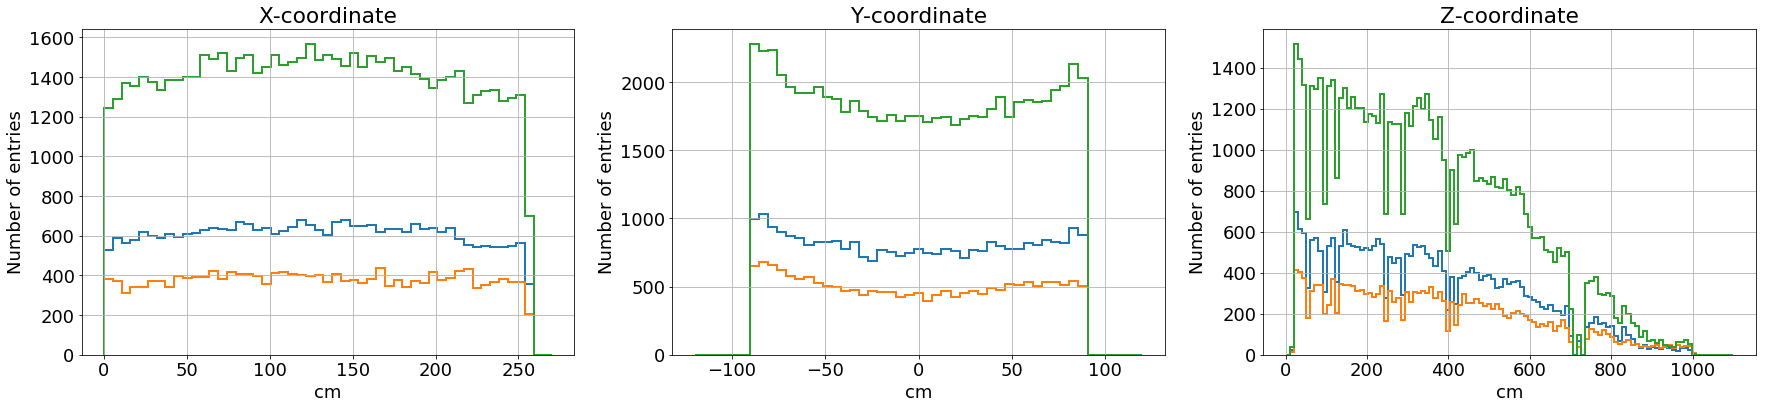

In [14]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(0,270,52)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Sps_beam_on['sps_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_beam_off['sps_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_overlay['sps_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("X-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(-120,120,50)
plt.hist(df_Sps_beam_on['sps_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_beam_off['sps_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_overlay['sps_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Y-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1100,110)
plt.hist(df_Sps_beam_on['sps_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_beam_off['sps_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.hist(df_Sps_overlay['sps_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Z-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

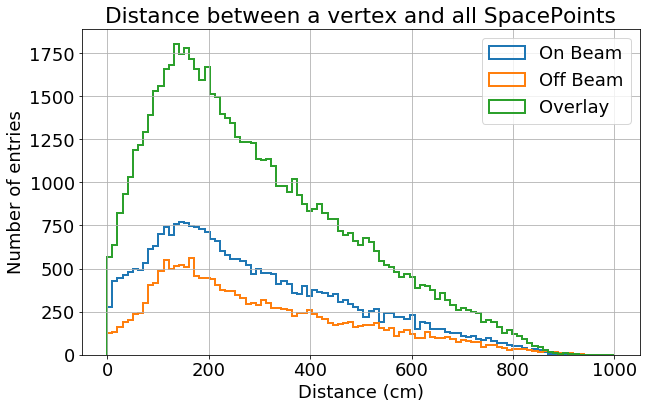

In [15]:
BINS = np.linspace(0,1000,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

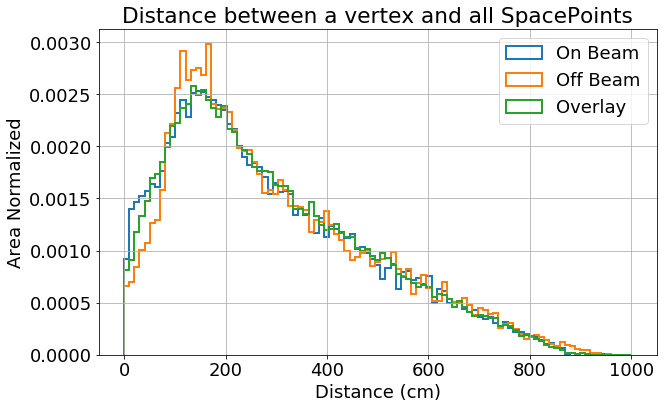

In [16]:
BINS = np.linspace(0,1000,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='On Beam',density=True)
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='Off Beam',density=True)
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Area Normalized')

plt.show()
#plt.draw()
fig.savefig('distance_full_area_norm_G10_removed', dpi=500)

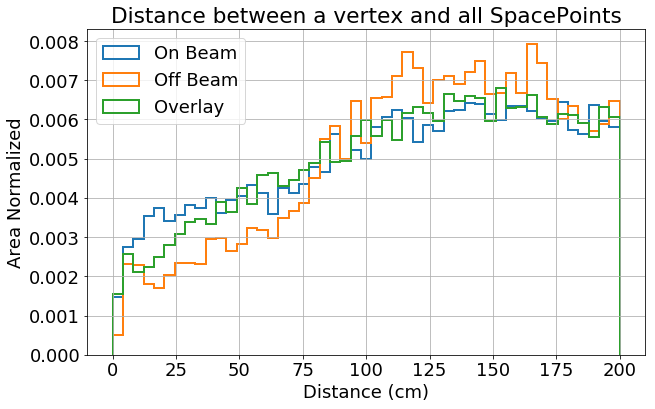

In [17]:
BINS = np.linspace(0,200,50)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_on['distance'].values,bins=BINS,histtype='step',lw=2,label='On Beam',density=True)
plt.hist(df_Sps_beam_off['distance'].values,bins=BINS,histtype='step',lw=2,label='Off Beam',density=True)
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.legend(loc=2)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Area Normalized')

plt.show()
#plt.draw()
fig.savefig('distance_area_norm_G10_removed', dpi=500)

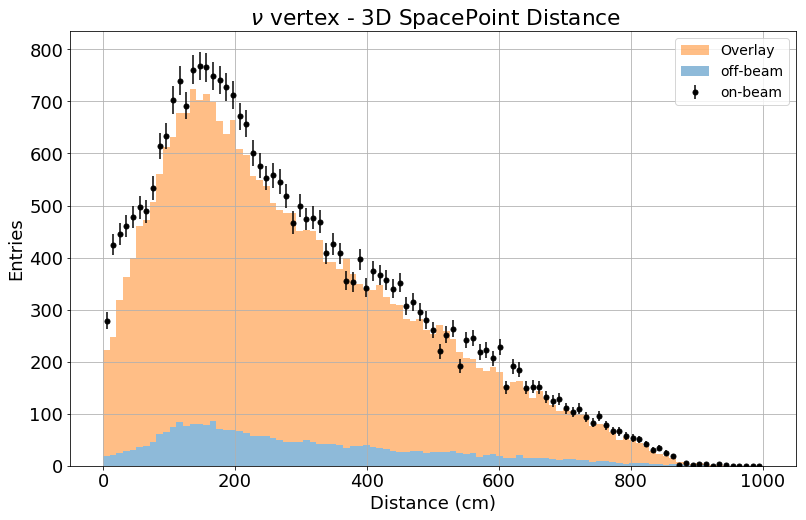

In [18]:
BINS = np.linspace(0,1000,100)


WEIGHTS_Sps = [weightsOFF_Sps,weightsOverlay_Sps]
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_overlay['distance'].values]
LABELS = ['off-beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Sps)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=1,fontsize=14)
plt.show()
fig.savefig('distance_excess_POT_normalization_G10_removed', dpi=500)



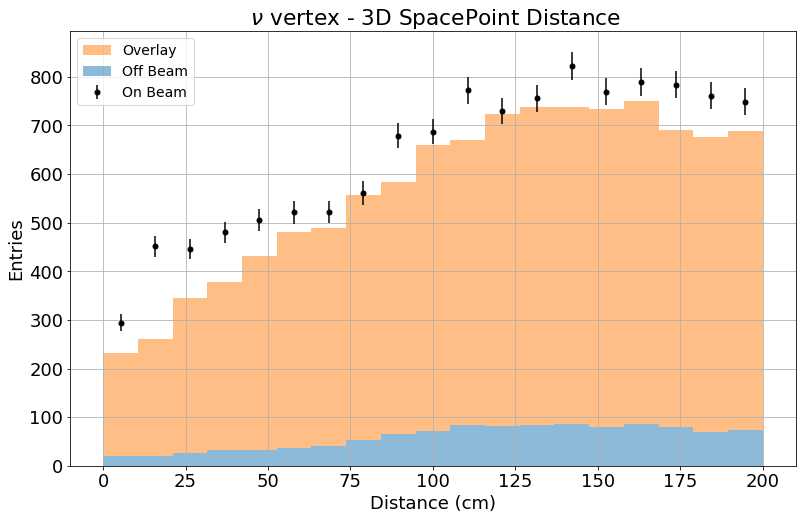

In [19]:
BINS = np.linspace(0,200,20)


WEIGHTS_Sps = [weightsOFF_Sps,weightsOverlay_Sps]
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_overlay['distance'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Sps)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='On Beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
fig.savefig('distance_excess_POT_norm_G10_removed', dpi=500)

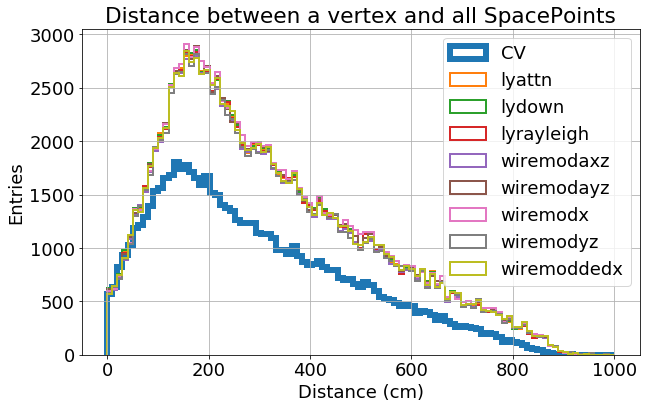

In [20]:
BINS = np.linspace(0,1000,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=6,label='CV')
plt.hist(df_Sps_lyattn['distance'].values,bins=BINS,histtype='step',lw=2,label='lyattn',weights=weightslyattn_Sps)
plt.hist(df_Sps_lydown['distance'].values,bins=BINS,histtype='step',lw=2,label='lydown',weights=weightslydown_Sps)
plt.hist(df_Sps_lyrayleigh['distance'].values,bins=BINS,histtype='step',lw=2,label='lyrayleigh',weights=weightslyrayleigh_Sps)
plt.hist(df_Sps_wiremodaxz['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodaxz',weights=weightswiremodaxz_Sps)
plt.hist(df_Sps_wiremodayz['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodayz',weights=weightswiremodayz_Sps)
plt.hist(df_Sps_wiremodx['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodx',weights=weightswiremodx_Sps)
plt.hist(df_Sps_wiremodyz['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodyz',weights=weightswiremodyz_Sps)
plt.hist(df_Sps_wiremoddedx['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremoddedx',weights=weightswiremoddedx_Sps)

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

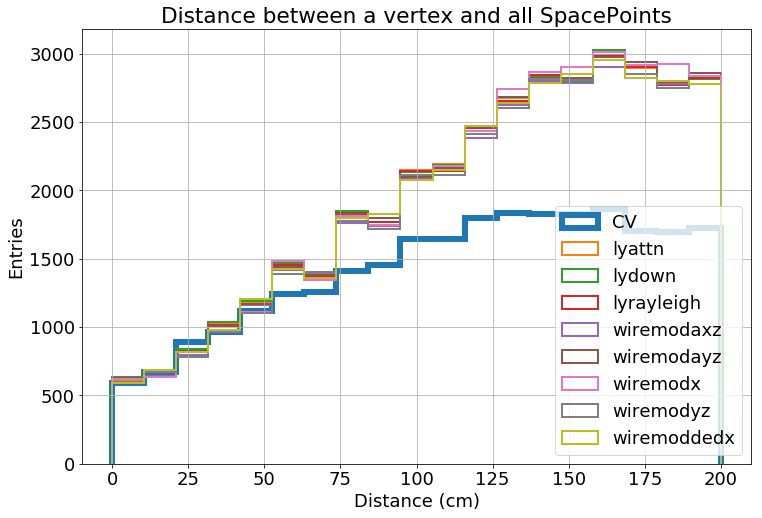

In [21]:
BINS = np.linspace(0,200,20)

fig = plt.figure(figsize=(12,8))
plt.hist(df_Sps_overlay['distance'].values,bins=BINS,histtype='step',lw=6,label='CV')
plt.hist(df_Sps_lyattn['distance'].values,bins=BINS,histtype='step',lw=2,label='lyattn',weights=weightslyattn_Sps)
plt.hist(df_Sps_lydown['distance'].values,bins=BINS,histtype='step',lw=2,label='lydown',weights=weightslydown_Sps)
plt.hist(df_Sps_lyrayleigh['distance'].values,bins=BINS,histtype='step',lw=2,label='lyrayleigh',weights=weightslyrayleigh_Sps)
plt.hist(df_Sps_wiremodaxz['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodaxz',weights=weightswiremodaxz_Sps)
plt.hist(df_Sps_wiremodayz['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodayz',weights=weightswiremodayz_Sps)
plt.hist(df_Sps_wiremodx['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodx',weights=weightswiremodx_Sps)
plt.hist(df_Sps_wiremodyz['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremodyz',weights=weightswiremodyz_Sps)
plt.hist(df_Sps_wiremoddedx['distance'].values,bins=BINS,histtype='step',lw=2,label='wiremoddedx',weights=weightswiremoddedx_Sps)

plt.legend(loc=4)

plt.grid()
plt.title("Distance between a vertex and all SpacePoints")
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')

plt.show()
#plt.draw()
fig.savefig('distance_CV-var', dpi=500)

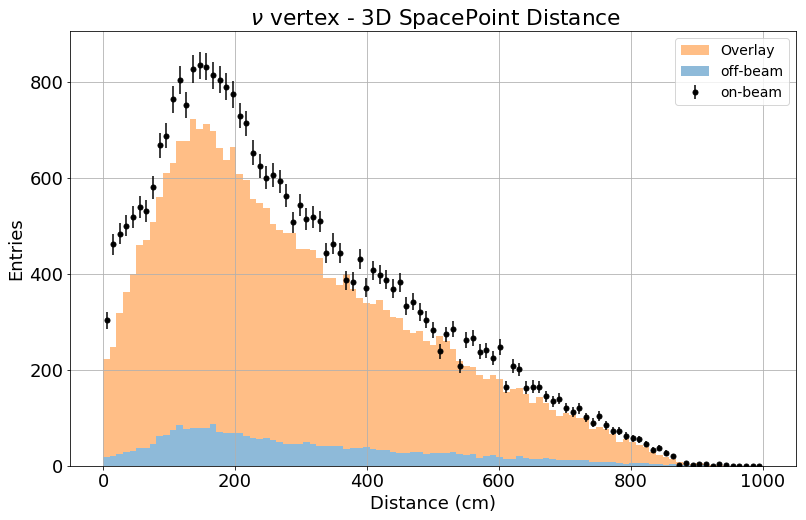

In [22]:
BINS = np.linspace(0,1000,100)


WEIGHTS_Sps_neutrino = [weightsOFF_Sps,weightsOverlay_Sps]
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_overlay['distance'].values]
LABELS = ['off-beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Sps_neutrino)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS,weights=weightsON_Sps_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=1,fontsize=14)
plt.show()
fig.savefig('distance_excess_neutrino_normalization_G10_removed', dpi=500)



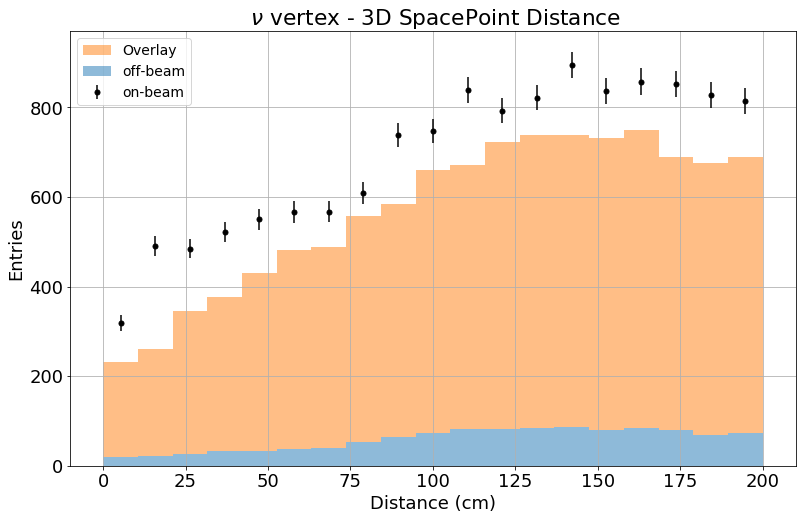

In [23]:
BINS = np.linspace(0,200,20)


WEIGHTS_Sps_neutrino = [weightsOFF_Sps,weightsOverlay_Sps]
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 18})

xstacked = [df_Sps_beam_off['distance'].values,df_Sps_overlay['distance'].values]
LABELS = ['off-beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Sps_neutrino)
vals,bine = np.histogram(df_Sps_beam_on['distance'].values,bins=BINS,weights=weightsON_Sps_neutrino)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')
plt.grid()
plt.xlabel('Distance (cm)')
plt.ylabel('Entries')
plt.title(" $\\nu$ vertex - 3D SpacePoint Distance")
plt.legend(loc=2,fontsize=14)
plt.show()
fig.savefig('distance_excess_neutrino_norm_G10_removed', dpi=500)


In [24]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

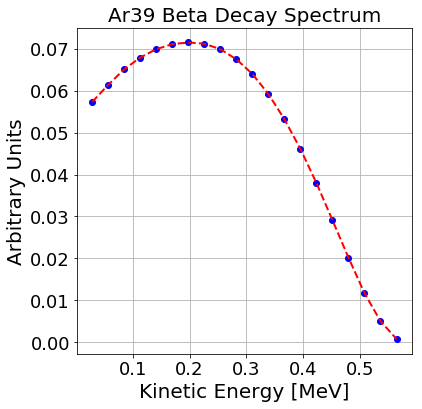

In [25]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

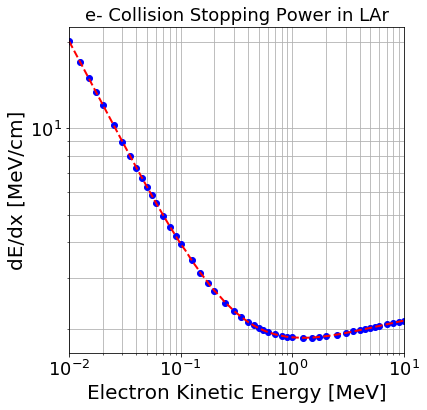

In [26]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

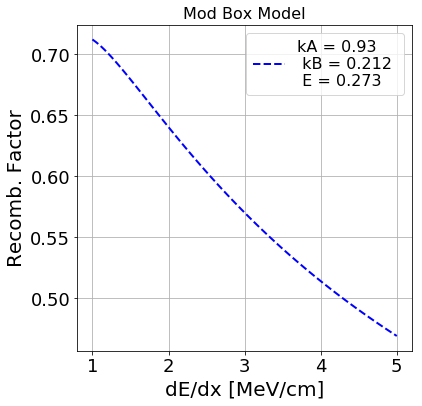

In [27]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

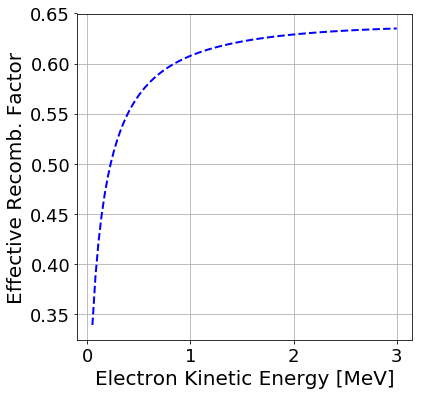

In [28]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



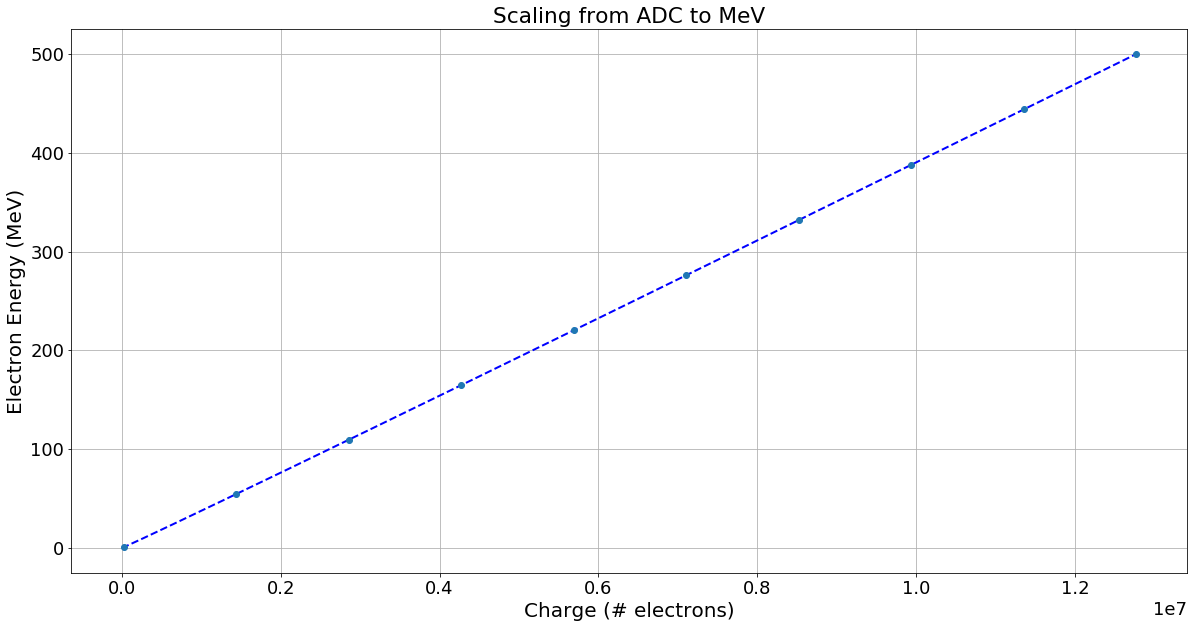

In [29]:
fig = plt.figure(figsize=(20,10))
Evals = np.linspace(0.001,500,500)
# Evals = np.linspace(0.001,30,500)

Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
# fig.savefig('Q2E.png', dpi=300)
# print (fQ2E(1425.54 * 238.4))
# print (fQ2E(521.225 * 238.4))
# print (fQ2E(2108.16 * 238.4))
# print (fQ2E(2026.97 * 238.4))
# print (fQ2E(1280.97 * 238.4))
# print (fQ2E(321.1692 * 238.4))



In [30]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.235949709195


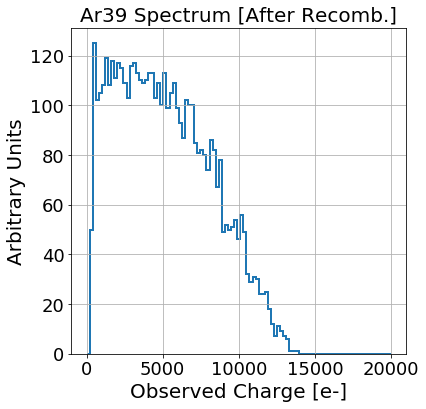

In [31]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [32]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

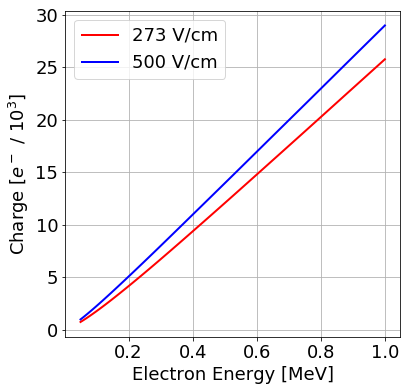

In [33]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [34]:
print Charge(0.2,0.273)


4129.221044959042


In [35]:
def E_recoY_off_sps(df,gain):
    YQ_off_sps = df['sps_cluster_charge']
    QrecoY_off_sps = YQ_off_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_sps = fQ2E(QrecoY_off_sps)
    return ErecoY_off_sps

def E_recoY_on_sps(df,gain):
    YQ_on_sps = df['sps_cluster_charge']
    QrecoY_on_sps = YQ_on_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on_sps = fQ2E(QrecoY_on_sps)
    return ErecoY_on_sps

def E_recoY_overlay_sps(df,gain):
    YQ_overlay_sps = df['sps_cluster_charge']
    QrecoY_overlay_sps = YQ_overlay_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay_sps = fQ2E(QrecoY_overlay_sps)
    return ErecoY_overlay_sps


In [36]:
df_sps_charge_50_off_sps=df_Sps_beam_off.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_off_sps['energy']=E_recoY_off_sps(df_sps_charge_50_off_sps,238.4)

df_sps_charge_50_on_sps=df_Sps_beam_on.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_on_sps['energy']=E_recoY_on_sps(df_sps_charge_50_on_sps,238.4)

df_sps_charge_50_overlay_sps=df_Sps_overlay.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_overlay_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_overlay_sps,238.4)

df_sps_charge_50_lyattn_sps=df_Sps_lyattn.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_lyattn_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_lyattn_sps,238.4)

df_sps_charge_50_lydown_sps=df_Sps_lydown.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_lydown_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_lydown_sps,238.4)

df_sps_charge_50_lyrayleigh_sps=df_Sps_lyrayleigh.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_lyrayleigh_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_lyrayleigh_sps,238.4)

df_sps_charge_50_wiremodaxz_sps=df_Sps_wiremodaxz.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_wiremodaxz_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_wiremodaxz_sps,238.4)

df_sps_charge_50_wiremodayz_sps=df_Sps_wiremodayz.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_wiremodayz_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_wiremodayz_sps,238.4)

df_sps_charge_50_wiremodyz_sps=df_Sps_wiremodyz.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_wiremodyz_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_wiremodyz_sps,238.4)

df_sps_charge_50_wiremodx_sps=df_Sps_wiremodx.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_wiremodx_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_wiremodx_sps,238.4)

df_sps_charge_50_wiremoddedx_sps=df_Sps_wiremoddedx.query('sps_cluster_charge * 238.4 < 7140000. and sps_cluster_charge > 0.')
df_sps_charge_50_wiremoddedx_sps['energy']=E_recoY_overlay_sps(df_sps_charge_50_wiremoddedx_sps,238.4)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

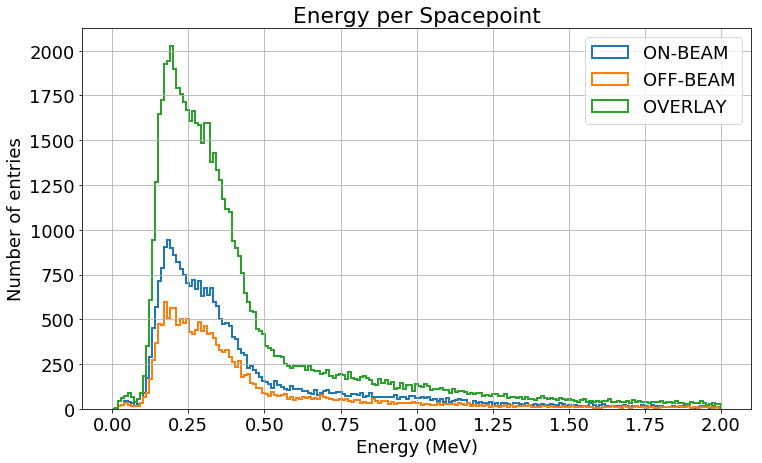

0.01572999225641739
0.014462308585518316
0.01297600629500085


In [37]:
BINS = np.linspace(0,2,200)

fig = plt.figure(figsize=(12,7))

plt.hist(df_sps_charge_50_on_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM')

plt.hist(df_sps_charge_50_off_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM')

plt.hist(df_sps_charge_50_overlay_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY')

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')


plt.show()
# fig.savefig('Energy_run1_sps', dpi=400)
print(df_sps_charge_50_on_sps['energy'].min())
print(df_sps_charge_50_off_sps['energy'].min())
print(df_sps_charge_50_overlay_sps['energy'].min())

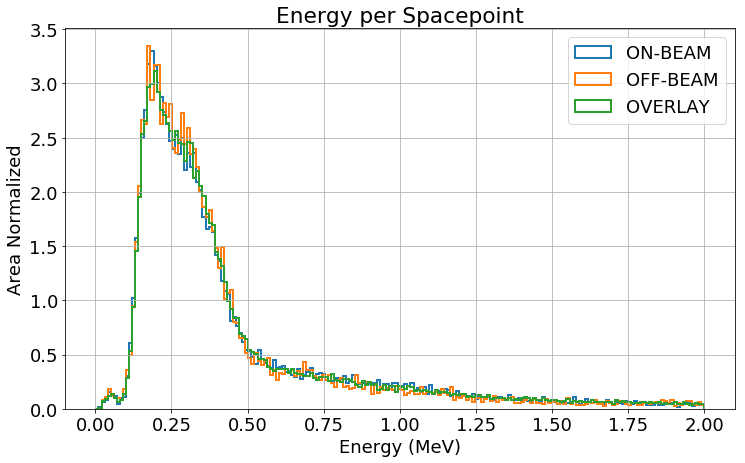

In [38]:
BINS = np.linspace(0,2,200)

fig = plt.figure(figsize=(12,7))

plt.hist(df_sps_charge_50_on_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM',density=True)

plt.hist(df_sps_charge_50_off_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM',density=True)

plt.hist(df_sps_charge_50_overlay_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY',density=True)

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')


plt.show()


In [39]:
nlyattn_Sps = len(df_sps_charge_50_lyattn_sps['energy'])
weightslyattn_Sps = np.ones(nlyattn_Sps) * lyattn_scaling # factor needed to scale overlay to on-beam

nlydown_Sps = len(df_sps_charge_50_lydown_sps['energy'])
weightslydown_Sps = np.ones(nlydown_Sps) * lydown_scaling # factor needed to scale overlay to on-beam

nlyrayleigh_Sps = len(df_sps_charge_50_lyrayleigh_sps['energy'])
weightslyrayleigh_Sps = np.ones(nlyrayleigh_Sps) * lyrayleigh_scaling # factor needed to scale overlay to on-beam

nwiremodaxz_Sps = len(df_sps_charge_50_wiremodaxz_sps['energy'])
weightswiremodaxz_Sps = np.ones(nwiremodaxz_Sps) * wiremodaxz_scaling # factor needed to scale overlay to on-beam

nwiremodayz_Sps = len(df_sps_charge_50_wiremodayz_sps['energy'])
weightswiremodayz_Sps = np.ones(nwiremodayz_Sps) * wiremodayz_scaling # factor needed to scale overlay to on-beam

nwiremodyz_Sps = len(df_sps_charge_50_wiremodyz_sps['energy'])
weightswiremodyz_Sps = np.ones(nwiremodyz_Sps) * wiremodyz_scaling # factor needed to scale overlay to on-beam

nwiremodx_Sps = len(df_sps_charge_50_wiremodx_sps['energy'])
weightswiremodx_Sps = np.ones(nwiremodx_Sps) * wiremodx_scaling # factor needed to scale overlay to on-beam

nwiremoddedx_Sps = len(df_sps_charge_50_wiremoddedx_sps['energy'])
weightswiremoddedx_Sps = np.ones(nwiremoddedx_Sps) * wiremoddedx_scaling # factor needed to scale overlay to on-beam


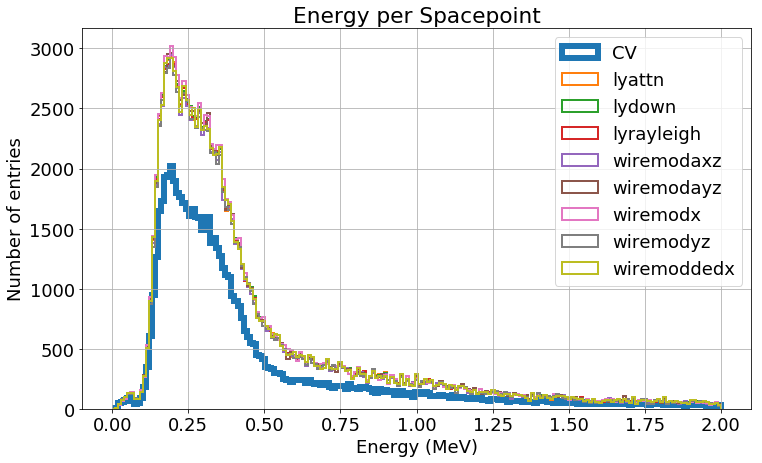

0.01297600629500085
0.015627521646159517
0.015627521646159517
0.015627521646159517
0.015627521646159517
0.015627521646159517
0.01628480594162661
0.015627521646159517
0.01628480594162661


In [40]:
BINS = np.linspace(0,2,200)

fig = plt.figure(figsize=(12,7))


plt.hist(df_sps_charge_50_overlay_sps['energy'].values,bins=BINS,histtype='step',lw=6,label='CV')
plt.hist(df_sps_charge_50_lyattn_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='lyattn',weights=weightslyattn_Sps)
plt.hist(df_sps_charge_50_lydown_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='lydown',weights=weightslydown_Sps)
plt.hist(df_sps_charge_50_lyrayleigh_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='lyrayleigh',weights=weightslyrayleigh_Sps)
plt.hist(df_sps_charge_50_wiremodaxz_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodaxz',weights=weightswiremodaxz_Sps)
plt.hist(df_sps_charge_50_wiremodayz_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodayz',weights=weightswiremodayz_Sps)
plt.hist(df_sps_charge_50_wiremodx_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodx',weights=weightswiremodx_Sps)
plt.hist(df_sps_charge_50_wiremodyz_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremodyz',weights=weightswiremodyz_Sps)
plt.hist(df_sps_charge_50_wiremoddedx_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='wiremoddedx',weights=weightswiremoddedx_Sps)

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')


plt.show()
fig.savefig('Energy_spectrum_CV-var', dpi=400)
print(df_sps_charge_50_overlay_sps['energy'].min())
print(df_sps_charge_50_lyattn_sps['energy'].min())
print(df_sps_charge_50_lydown_sps['energy'].min())
print(df_sps_charge_50_lyrayleigh_sps['energy'].min())
print(df_sps_charge_50_wiremodaxz_sps['energy'].min())
print(df_sps_charge_50_wiremodayz_sps['energy'].min())
print(df_sps_charge_50_wiremodyz_sps['energy'].min())
print(df_sps_charge_50_wiremodx_sps['energy'].min())
print(df_sps_charge_50_wiremoddedx_sps['energy'].min())
